# ==================What shopper want ?===================
### Analyzed by Marco Lin

![](https://previews.123rf.com/images/antonioguillem/antonioguillem1611/antonioguillem161100145/66433081-amazed-shopper-opening-mouth-holding-shopping-bags-watching-special-offers-in-stores-and-pointing-in.jpg)

# ================objecctive of the project ================

#### This report is for Amazon Prime service offering $20,000 bonus to the employee in the data science team. They are trying to understand the market to better target shoppers. 
#### So, in this time, we have three datasets. Stores dataset is the information of store, such as, size and type. Sales dataset has date, number of weekly sales, store, and department number. The features dataset has temperature, fuel price, CPI, and unemployment data. First, we gonna explore the information from data. 
#### We will try to predict the weekly sales, thus we need to find the correlation between weekly sales and each column. We have four aspect of data exploration at the first, 1. The tendency of weekly sales though years. 2.Most all of type pf store. 3. The size of store. 4.The changing of fuel price. Then, we will merge three dataset for analysis. We will try to find models which allows us to predict sales. 

# ==================Initialization==================

In [1]:
library(tidyverse)
options(scipen=999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
stores <- read.csv("~/project-ionic/R/week7/retail-data-analytics/stores data-set.csv")

In [3]:
sales <- read.csv("~/project-ionic/R/week7/retail-data-analytics/sales data-set.csv")

In [4]:
features<- read.csv("~/project-ionic/R/week7/retail-data-analytics/Features data set.csv")

In [5]:
stores$Store <- as.factor(stores$Store)
head (stores)
str(stores)


Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505


'data.frame':	45 obs. of  3 variables:
 $ Store: Factor w/ 45 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Type : Factor w/ 3 levels "A","B","C": 1 1 2 1 2 1 2 1 2 2 ...
 $ Size : int  151315 202307 37392 205863 34875 202505 70713 155078 125833 126512 ...


In [6]:
sales$Store <- as.factor(sales$Store)
sales$Dept <- as.factor(sales$Dept)
sales$Date <- as.Date(sales$Date, "%d/%m/%Y")
head(sales)
str(sales)
summary(sales)

Store,Dept,Date,Weekly_Sales,IsHoliday,Year
1,1,2010-02-05,24924.50,FALSE,2010
1,1,2010-02-12,46039.49,TRUE,2010
1,1,2010-02-19,41595.55,FALSE,2010
1,1,2010-02-26,19403.54,FALSE,2010
1,1,2010-03-05,21827.90,FALSE,2010
1,1,2010-03-12,21043.39,FALSE,2010


'data.frame':	421570 obs. of  6 variables:
 $ Store       : Factor w/ 45 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Dept        : Factor w/ 81 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : Date, format: "2010-02-05" "2010-02-12" ...
 $ Weekly_Sales: num  24924 46039 41596 19404 21828 ...
 $ IsHoliday   : logi  FALSE TRUE FALSE FALSE FALSE FALSE ...
 $ Year        : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


     Store             Dept             Date             Weekly_Sales   
 13     : 10474   1      :  6435   Min.   :2010-02-05   Min.   : -4989  
 10     : 10315   2      :  6435   1st Qu.:2010-10-08   1st Qu.:  2080  
 4      : 10272   3      :  6435   Median :2011-06-17   Median :  7612  
 1      : 10244   4      :  6435   Mean   :2011-06-18   Mean   : 15981  
 2      : 10238   7      :  6435   3rd Qu.:2012-02-24   3rd Qu.: 20206  
 24     : 10228   8      :  6435   Max.   :2012-10-26   Max.   :693099  
 (Other):359799   (Other):382960                                        
 IsHoliday            Year     
 Mode :logical   Min.   :2010  
 FALSE:391909    1st Qu.:2010  
 TRUE :29661     Median :2011  
                 Mean   :2011  
                 3rd Qu.:2012  
                 Max.   :2012  
                               

In [7]:
features$Store <- as.factor(features$Store)
features$Date <- as.Date(features$Date, "%d/%m/%Y")
head(features)
str(features)
summary(features)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year
1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,2010
1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE,2010
1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE,2010
1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE,2010
1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE,2010
1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE,2010


'data.frame':	8190 obs. of  13 variables:
 $ Store       : Factor w/ 45 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : Date, format: "2010-02-05" "2010-02-12" ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ MarkDown1   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown2   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown3   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown4   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown5   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...
 $ IsHoliday   : logi  FALSE TRUE FALSE FALSE FALSE FALSE ...
 $ Year        : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


     Store           Date             Temperature       Fuel_Price   
 1      : 182   Min.   :2010-02-05   Min.   : -7.29   Min.   :2.472  
 2      : 182   1st Qu.:2010-12-17   1st Qu.: 45.90   1st Qu.:3.041  
 3      : 182   Median :2011-10-31   Median : 60.71   Median :3.513  
 4      : 182   Mean   :2011-10-31   Mean   : 59.36   Mean   :3.406  
 5      : 182   3rd Qu.:2012-09-14   3rd Qu.: 73.88   3rd Qu.:3.743  
 6      : 182   Max.   :2013-07-26   Max.   :101.95   Max.   :4.468  
 (Other):7098                                                        
   MarkDown1        MarkDown2           MarkDown3           MarkDown4       
 Min.   : -2781   Min.   :  -265.76   Min.   :  -179.26   Min.   :    0.22  
 1st Qu.:  1578   1st Qu.:    68.88   1st Qu.:     6.60   1st Qu.:  304.69  
 Median :  4744   Median :   364.57   Median :    36.26   Median : 1176.42  
 Mean   :  7032   Mean   :  3384.18   Mean   :  1760.10   Mean   : 3292.94  
 3rd Qu.:  8923   3rd Qu.:  2153.35   3rd Qu.:   163.15

### Explanation: Import the dataset, and make sure the type of data is ok.

# ===========Data Exploration=========

## 1.) Weekly Sales Tendency per Year

In [8]:
sales_notholiday<- sales %>% filter(IsHoliday == FALSE)  %>% group_by(Year) %>% summarize("Average_Sales_nothoilday" = mean(Weekly_Sales))

sales_isholiday<- sales %>% filter(IsHoliday == TRUE) %>% group_by(Year) %>% summarize("Average_Sales_holiday" = mean(Weekly_Sales))

total_sales <- merge (sales_notholiday, sales_isholiday)

total_sales

Year,Average_Sales_nothoilday,Average_Sales_holiday
2010,16203.11,17005.66
2011,15837.05,17343.58
2012,15656.36,16480.55


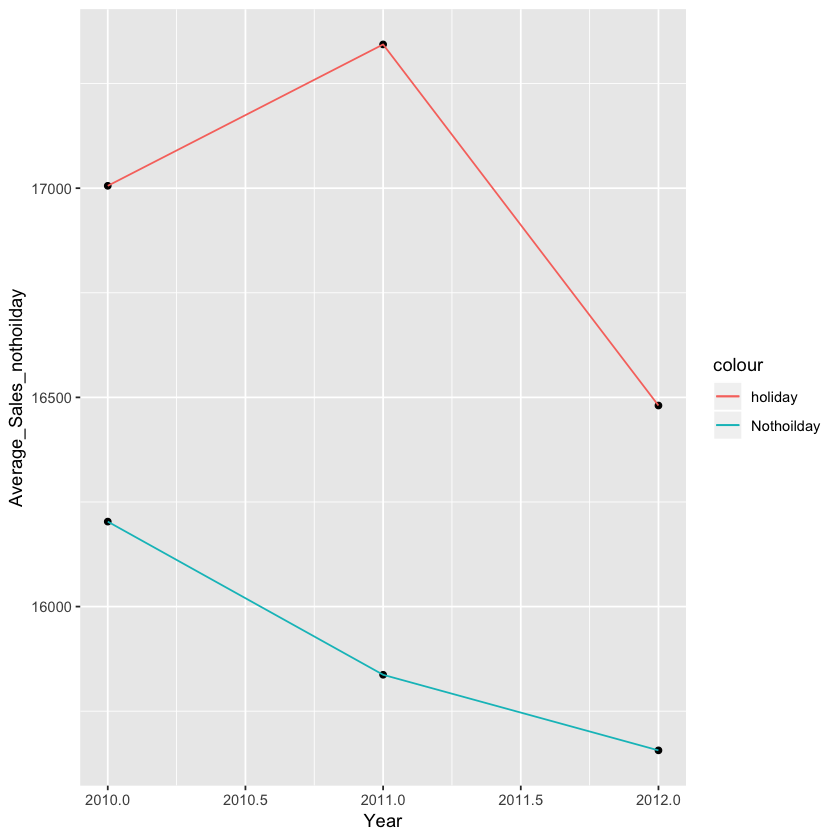

In [9]:
ggplot(total_sales, aes(x=Year)) + 
            geom_point(aes(y=Average_Sales_nothoilday), ) + 
            geom_line(aes(y=Average_Sales_nothoilday,color="Nothoilday")) +
            geom_point(aes(y=Average_Sales_holiday)) + 
            geom_line(aes(y=Average_Sales_holiday, color="holiday"))


### Explanation: In order to analyze the weekly sales, we calculate the average of weekly sales per year. It appears that the weekly sales in hoilday are greater than weekly sales in not holiday every year. 

## 2.) Stores Type

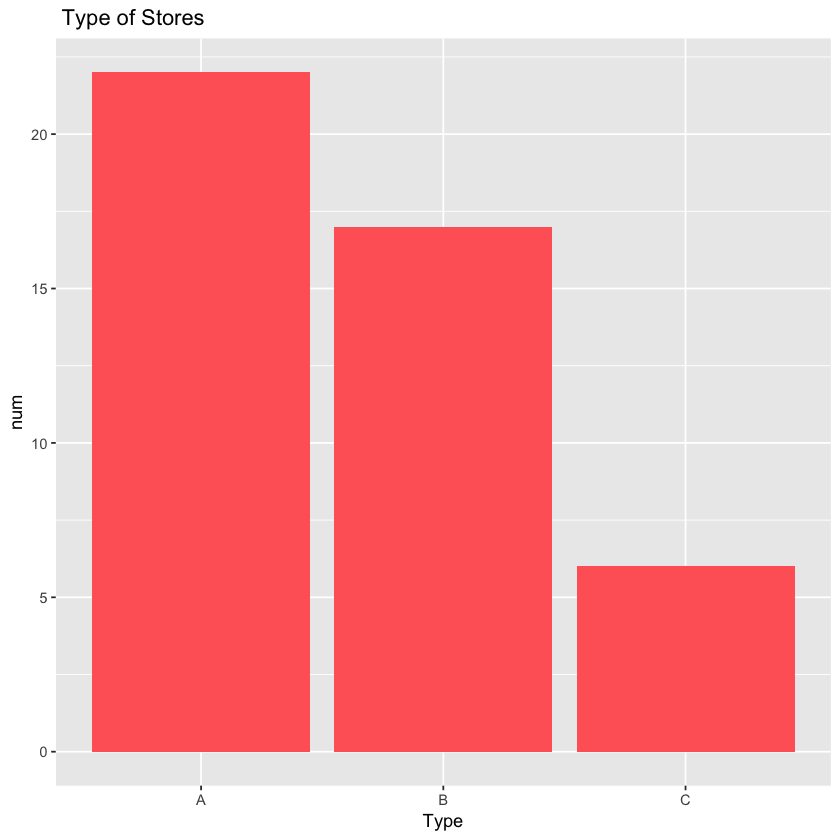

In [10]:
type_stores <- stores %>% group_by(Type) %>% summarize(num = n())
ggplot(type_stores, aes( x = Type, y = num)) + geom_bar(stat = "identity", fill = "#FF6666") + ggtitle(" Type of Stores") +
theme(axis.text.x=element_text(size=rel(1)))

### Explanation: 
#### A type of story take up most of part in this three type.

## 3.) Stores size in three type of stores.

Store,Type,Size
2,A,202307
4,A,205863
6,A,202505
11,A,207499
13,A,219622
14,A,200898
19,A,203819
20,A,203742
24,A,203819
27,A,204184


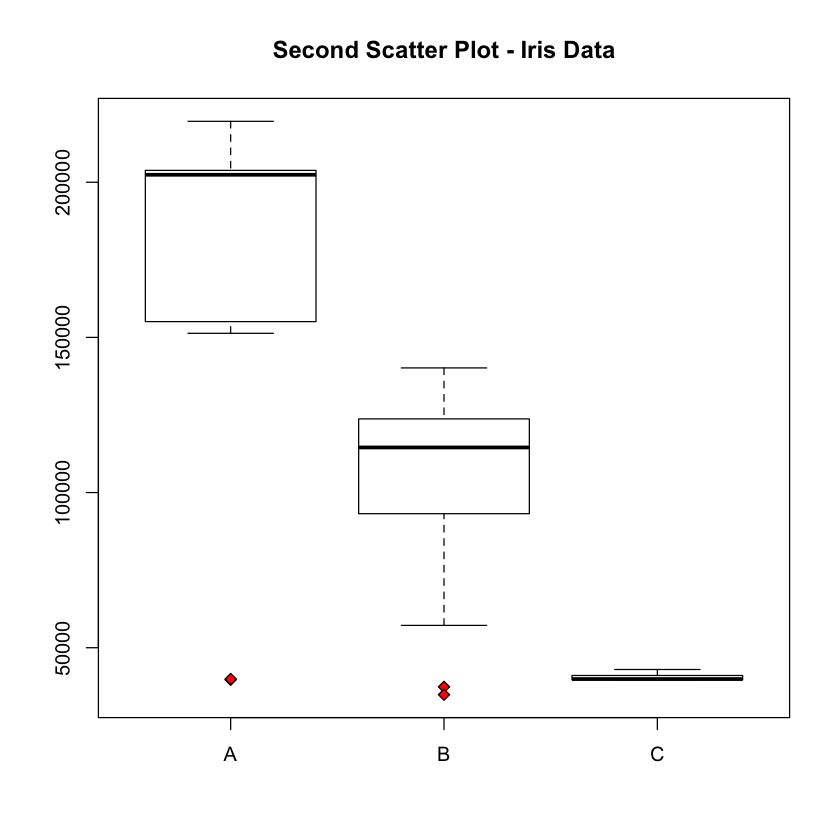

In [11]:
bigSizeStores <- stores %>% filter(Size >= 200000)
bigSizeStores

plot(stores$Type, stores$Size, 
     pch=23, bg=c("red","green","blue")[unclass(stores$Type)], 
     main="Second Scatter Plot - Iris Data")

### Explanation: 
#### The size of A type store is bigger than the others. It appears that the C type of store is smallest store in this dataset.

## 4.) Fuel Price tendency in four years.

Year,Average_Fuel_Price
2010,2.823767
2011,3.561915
2012,3.672084
2013,3.606058


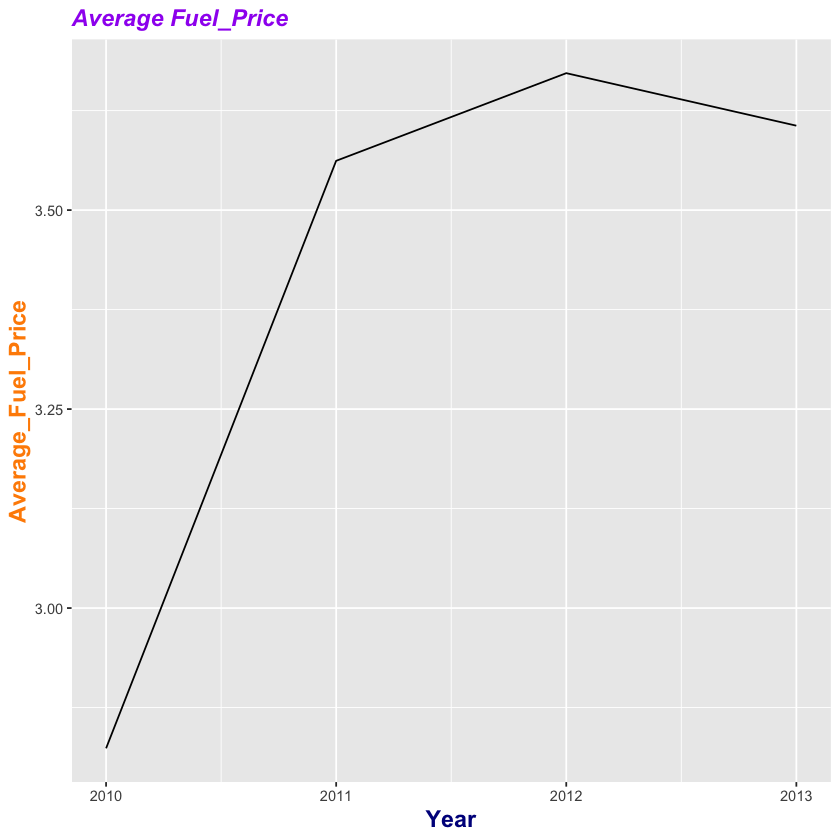

In [12]:
Fuel_Price_features <- features %>% group_by(Year) %>% summarize(Average_Fuel_Price = mean(Fuel_Price))
head (Fuel_Price_features, 10)


ggplot(Fuel_Price_features, aes(x=Year, y=Average_Fuel_Price), ylab = "Sales", xlab = "Year") + geom_line()+
ggtitle("Average Fuel_Price")+ theme(
plot.title = element_text(color="purple", size=14, face="bold.italic"),
axis.title.x = element_text(color="darkblue", size=14, face="bold"),
axis.title.y = element_text(color="darkorange", size=14, face="bold"))

### Explanation: 

#### The price of fuel was going up from 2010 to 2012. After 2012, the price has started to go down.

# =================Merge=================

In [13]:
head(features)
head(sales)
head(stores)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year
1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,2010
1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE,2010
1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE,2010
1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE,2010
1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE,2010
1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE,2010


Store,Dept,Date,Weekly_Sales,IsHoliday,Year
1,1,2010-02-05,24924.50,FALSE,2010
1,1,2010-02-12,46039.49,TRUE,2010
1,1,2010-02-19,41595.55,FALSE,2010
1,1,2010-02-26,19403.54,FALSE,2010
1,1,2010-03-05,21827.90,FALSE,2010
1,1,2010-03-12,21043.39,FALSE,2010


Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505


In [14]:
sale2 <- sales %>% group_by(Store,Date)%>% summarize (total_sales= sum(Weekly_Sales))
head(sale2)

Store,Date,total_sales
1,2010-02-05,1643691
1,2010-02-12,1641957
1,2010-02-19,1611968
1,2010-02-26,1409728
1,2010-03-05,1554807
1,2010-03-12,1439542


In [15]:
merge1 <- merge (features, sale2, by = c("Store","Date"),all = T)
head(merge1)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,total_sales
1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,2010,1643691
1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE,2010,1641957
1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE,2010,1611968
1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE,2010,1409728
1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE,2010,1554807
1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE,2010,1439542


In [16]:
sales_all <- merge(merge1, stores, by.x = "Store", by.y = "Store" )

In [17]:
head(sales_all)
names(sales_all)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,total_sales,Type,Size
1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,2010,1643691,A,151315
1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE,2010,1641957,A,151315
1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE,2010,1611968,A,151315
1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE,2010,1409728,A,151315
1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE,2010,1554807,A,151315
1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE,2010,1439542,A,151315


[1] "Store"        "Date"         "Temperature"  "Fuel_Price"   "MarkDown1"   
 [6] "MarkDown2"    "MarkDown3"    "MarkDown4"    "MarkDown5"    "CPI"         
[11] "Unemployment" "IsHoliday"    "Year"         "total_sales"  "Type"        
[16] "Size"

### Explanation: 
#### We merged three dataset.  First, we merged the features and sales with Store and Date. But the problem was that the date was not the factor becasue in store 1, it had different department numbers. There was many same date that may cause problem for merge. So, I calculated the average of weekly sales between different department in same store. After that, we could merge with Store number and Date. 

# ==========Simple Linear Regression===========

In [18]:
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [19]:
head (sales_all)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,total_sales,Type,Size
1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE,2010,1643691,A,151315
1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE,2010,1641957,A,151315
1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE,2010,1611968,A,151315
1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE,2010,1409728,A,151315
1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE,2010,1554807,A,151315
1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE,2010,1439542,A,151315


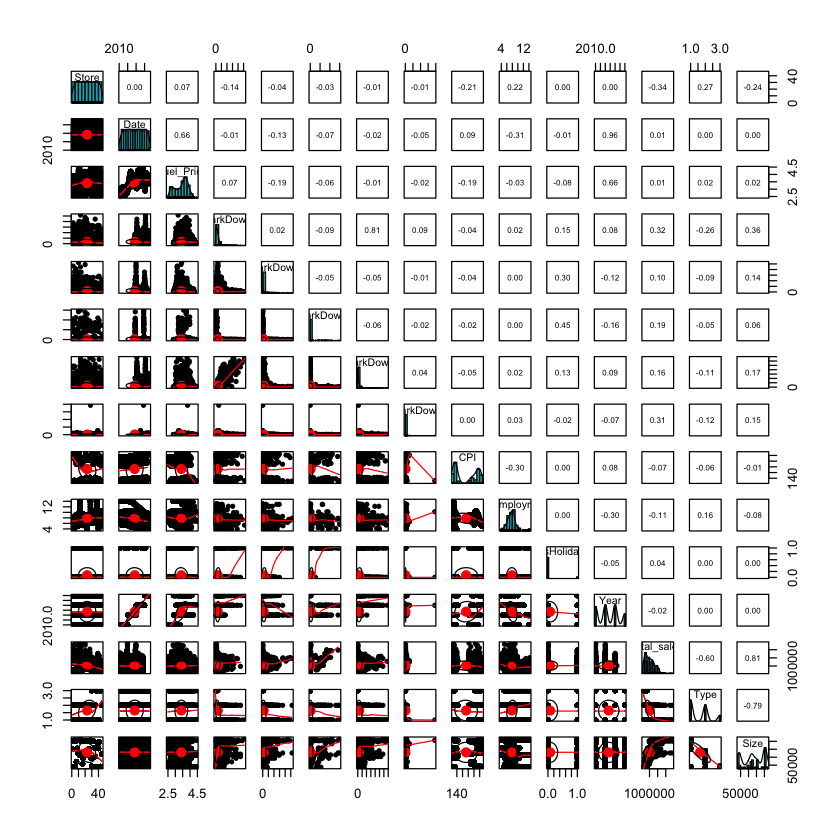

In [20]:
pairs.panels(sales_all[,-3], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)

## a. Sales and MarkDown1


Call:
lm(formula = total_sales ~ MarkDown1, data = sales_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-1952841  -431065  -103807   352399  2703561 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 917453.500  14904.877   61.55 <0.0000000000000002 ***
MarkDown1       22.492      1.396   16.11 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 545500 on 2278 degrees of freedom
  (5910 observations deleted due to missingness)
Multiple R-squared:  0.1023,	Adjusted R-squared:  0.1019 
F-statistic: 259.5 on 1 and 2278 DF,  p-value: < 0.00000000000000022


Warning message:
“Removed 5910 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5910 rows containing missing values (geom_point).”Warning message:
“Removed 5910 rows containing missing values (geom_point).”

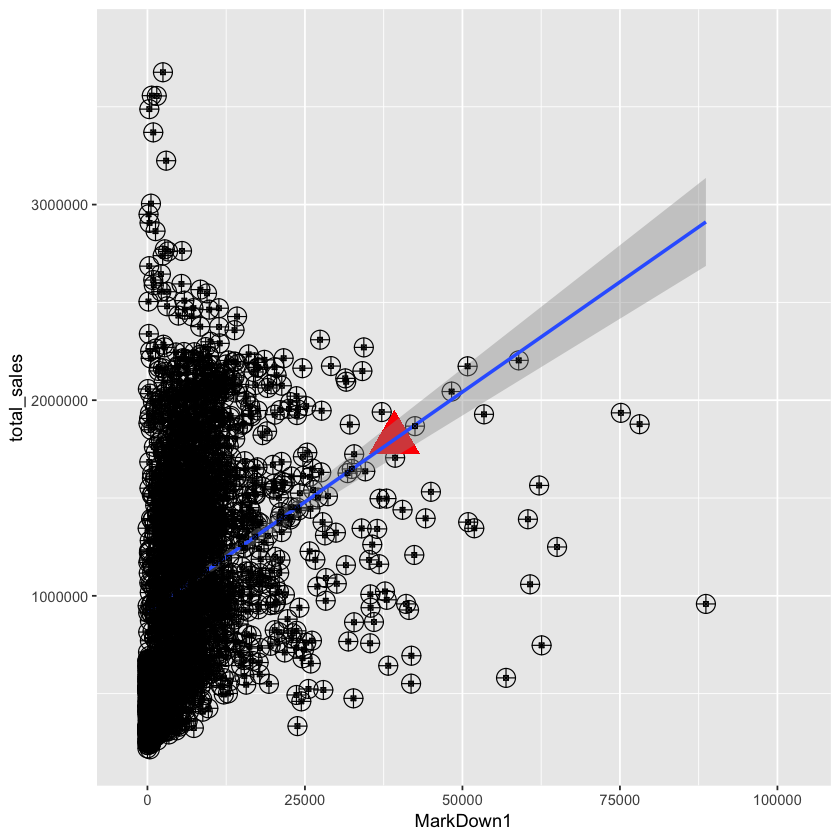

In [21]:
mod1 <- lm(total_sales~MarkDown1, data = sales_all)
summary(mod1)

new1 <- data.frame(MarkDown1 = 39203) 
result1 <- predict(mod1, newdata = new1) 

ggplot(sales_all, aes(x = MarkDown1 , y = total_sales )) +geom_point(shape = 10, size = 5) + 
geom_point(x = new1$MarkDown1, y = result1, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "MarkDown1", y = "total_sales") 

### Explanation: 

#### In model1, we use MarkDown1 data to predict weekly sales. It appears that the Multiple R-squared is only 0.1023. It represents a regression that does not explain the variance in the response variable well. We can say the markDown1 can't predict sales very well.

## b.Sales and store Size


Call:
lm(formula = total_sales ~ Size, data = sales_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-618490 -244595  -32219  161036 2729454 

Coefficients:
               Estimate  Std. Error t value            Pr(>|t|)    
(Intercept) 102786.5250   9454.0770   10.87 <0.0000000000000002 ***
Size             7.2469      0.0653  110.97 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 330600 on 6433 degrees of freedom
  (1755 observations deleted due to missingness)
Multiple R-squared:  0.6569,	Adjusted R-squared:  0.6568 
F-statistic: 1.231e+04 on 1 and 6433 DF,  p-value: < 0.00000000000000022


Warning message:
“Removed 1755 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1755 rows containing missing values (geom_point).”Warning message:
“Removed 1755 rows containing missing values (geom_point).”

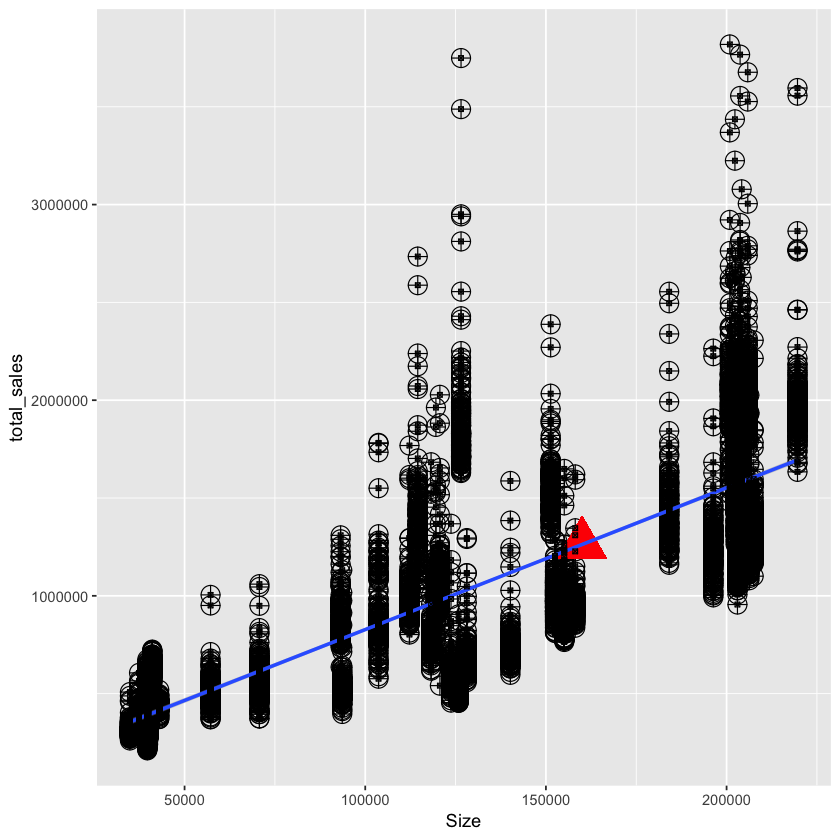

In [22]:
mod2 <- lm(total_sales~Size, data = sales_all)
summary(mod2)

new2 <- data.frame(Size = 160000) 
result2 <- predict(mod2, newdata = new2) 

ggplot(sales_all, aes(x = Size , y = total_sales )) +geom_point(shape = 10, size = 5) + 
geom_point(x = new2$Size, y = result2, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Size", y = "total_sales") 

### Explanation:
#### In model2, the sales and stories size, It appears that the Multiple R-squared is up to 0.6 that represents a regression can predict the weekly sales well. So, the size of store may predict sales well

## c. Sales and Fuel_Price

In [23]:
sales_allF <- sales_all %>% filter (Store == 2)


Call:
lm(formula = total_sales ~ Fuel_Price, data = sales_allF)

Residuals:
    Min      1Q  Median      3Q     Max 
-266262 -129028  -29070   42413 1473806 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  2277438     149171  15.267 <0.0000000000000002 ***
Fuel_Price   -109230      45931  -2.378              0.0187 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 233900 on 141 degrees of freedom
  (39 observations deleted due to missingness)
Multiple R-squared:  0.03856,	Adjusted R-squared:  0.03174 
F-statistic: 5.656 on 1 and 141 DF,  p-value: 0.01874


Warning message:
“Removed 39 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 39 rows containing missing values (geom_point).”Warning message:
“Removed 39 rows containing missing values (geom_point).”

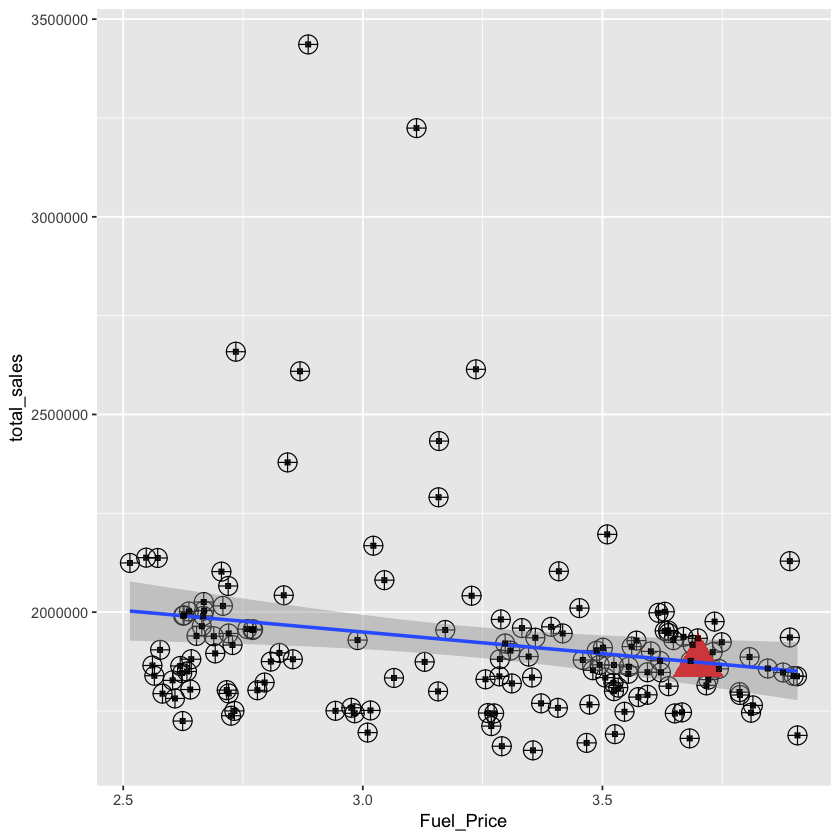

In [24]:
mod3 <- lm(total_sales~Fuel_Price, data = sales_allF)
summary(mod3)

new3 <- data.frame(Fuel_Price = 3.7) 
result3 <- predict(mod3, newdata = new3) 


ggplot(sales_allF, aes(x = Fuel_Price , y = total_sales )) +geom_point(shape = 10, size = 5) + 
geom_point(x = new3$Fuel_Price, y = result3, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Fuel_Price", y = "total_sales") 

### Explanation:
#### In model3, the sales and fuel price, It appears that the Multiple R-squared is up to 0.03 that represents fuel price can barely predict the weekly sales. 

## d. Sales and Temperature


Call:
lm(formula = total_sales ~ Temperature, data = sales_allF)

Residuals:
    Min      1Q  Median      3Q     Max 
-346314 -117725  -36965   70584 1426929 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  2237280      86268  25.934 < 0.0000000000000002 ***
Temperature    -4567       1233  -3.703             0.000305 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 227700 on 141 degrees of freedom
  (39 observations deleted due to missingness)
Multiple R-squared:  0.08861,	Adjusted R-squared:  0.08215 
F-statistic: 13.71 on 1 and 141 DF,  p-value: 0.0003055


Warning message:
“Removed 39 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 39 rows containing missing values (geom_point).”Warning message:
“Removed 39 rows containing missing values (geom_point).”

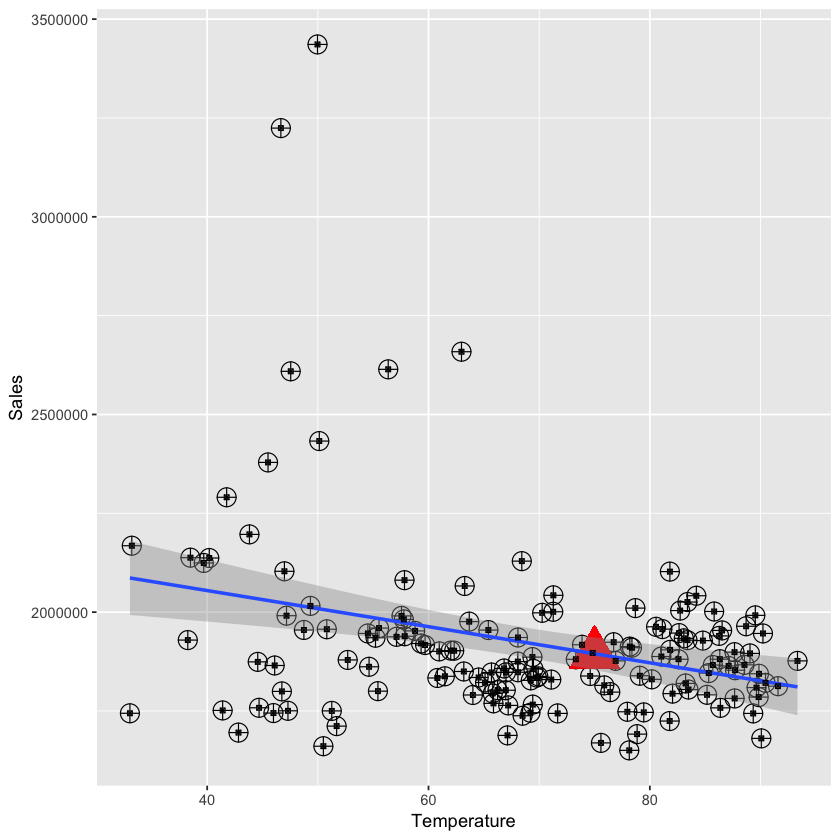

In [25]:
mod4 <- lm(total_sales~Temperature, data = sales_allF)
summary(mod4)

new4 <- data.frame(Temperature = 75) 
result4 <- predict(mod4, newdata = new4) 


ggplot(sales_allF, aes(x = Temperature , y = total_sales )) +geom_point(shape = 10, size = 5) + 
geom_point(x = new4$Temperature, y = result4, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Temperature", y = "Sales") 

### Explanation:
#### In model4, the sales and temperature, It appears that the Multiple R-squared is 0.086 that represents a regression can barely predict the weekly sales well.¶

## e. Sales and MarkDown5


Call:
lm(formula = total_sales ~ MarkDown5, data = sales_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-2619617  -442585   -77685   348145  2610129 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 934364.859  14358.592   65.07 <0.0000000000000002 ***
MarkDown5       29.998      1.952   15.37 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 548700 on 2293 degrees of freedom
  (5895 observations deleted due to missingness)
Multiple R-squared:  0.09337,	Adjusted R-squared:  0.09297 
F-statistic: 236.1 on 1 and 2293 DF,  p-value: < 0.00000000000000022


Warning message:
“Removed 5895 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5895 rows containing missing values (geom_point).”Warning message:
“Removed 5895 rows containing missing values (geom_point).”

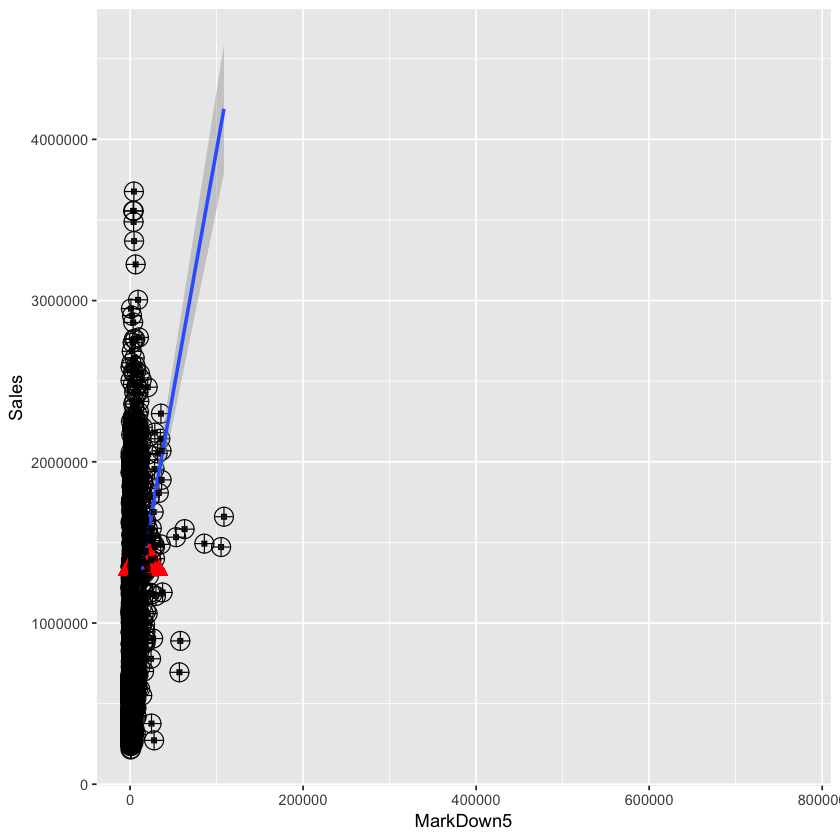

In [32]:
mod5 <- lm(total_sales~MarkDown5, data = sales_all)
summary(mod5)

new5 <- data.frame(MarkDown5 = 15000) 
result5 <- predict(mod5, newdata = new5) 


ggplot(sales_all, aes(x = MarkDown5 , y = total_sales )) +geom_point(shape = 10, size = 5) + 
geom_point(x = new5$MarkDown5, y = result5, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "MarkDown5", y = "Sales") 

### Explanation:

#### In model4, the sales and MarkDown5, It appears that the Multiple R-squared is 0.09 that represents a regression can barely predict the weekly sales well.¶

# ==========Model Comparison===========

### According to the models above, for accuracy of prediction, we compared each model and pick up the model2 which has highest R-squared value. The size of store can effect the weekly sales very well. 

# ==========Multiple Linear Regression===========

In [28]:
names(sales_all)

[1] "Store"        "Date"         "Temperature"  "Fuel_Price"   "MarkDown1"   
 [6] "MarkDown2"    "MarkDown3"    "MarkDown4"    "MarkDown5"    "CPI"         
[11] "Unemployment" "IsHoliday"    "Year"         "total_sales"  "Type"        
[16] "Size"

In [34]:
mod6 <- lm(total_sales~MarkDown1+MarkDown5+Size+Fuel_Price, data = sales_all)
summary(mod6)


Call:
lm(formula = total_sales ~ MarkDown1 + MarkDown5 + Size + Fuel_Price, 
    data = sales_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-602101 -245942  -38094  162582 2446913 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) 373345.3652  91786.8365   4.068            0.0000491 ***
MarkDown1        0.9504      0.9398   1.011              0.31199    
MarkDown5        4.0803      1.2856   3.174              0.00152 ** 
Size             7.2232      0.1268  56.982 < 0.0000000000000002 ***
Fuel_Price  -74279.0554  24684.0295  -3.009              0.00265 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 337900 on 2275 degrees of freedom
  (5910 observations deleted due to missingness)
Multiple R-squared:  0.6561,	Adjusted R-squared:  0.6555 
F-statistic:  1085 on 4 and 2275 DF,  p-value: < 0.00000000000000022


### Explanation: In model6, I chose the features like MarkDown1, MarkDown5, Size, Fuel Price to find the best multiple linear regression. As we saw, the R-squared value is 0.6561 which is ok for prediction. in addition, it appeares that MarkDown1 is barely have affect on this regression.

In [35]:
mod7 <- lm(total_sales~Unemployment+MarkDown5+Size+Fuel_Price, data = sales_all)
summary(mod7)


Call:
lm(formula = total_sales ~ Unemployment + MarkDown5 + Size + 
    Fuel_Price, data = sales_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-650149 -238335  -40489  168419 2453627 

Coefficients:
                Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)  402978.0437  90668.7726   4.445           0.00000923 ***
Unemployment -19802.4688   4207.1442  -4.707           0.00000267 ***
MarkDown5         4.4401      1.2738   3.486               0.0005 ***
Size              7.2286      0.1177  61.429 < 0.0000000000000002 ***
Fuel_Price   -41035.7103  25140.4198  -1.632               0.1028    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 335400 on 2290 degrees of freedom
  (5895 observations deleted due to missingness)
Multiple R-squared:  0.6618,	Adjusted R-squared:  0.6612 
F-statistic:  1120 on 4 and 2290 DF,  p-value: < 0.00000000000000022


### Explanation:

#### In model7, we changed the MarkDown1 to Unemployment. The analysis shows us that three features which have three stars each are correlated with regression. The R-squared value almost same as the model6. It seems like the fuel price will not effect our predict with this linear regression.

In [36]:
mod8 <- lm(total_sales~Unemployment+MarkDown5+Size, data = sales_all)
summary(mod8)


Call:
lm(formula = total_sales ~ Unemployment + MarkDown5 + Size, data = sales_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-654534 -237791  -39120  162739 2459310 

Coefficients:
                Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)  266319.5296  34815.0152   7.650   0.0000000000000295 ***
Unemployment -21573.0801   4066.3694  -5.305   0.0000001233366975 ***
MarkDown5         4.7268      1.2620   3.745             0.000185 ***
Size              7.2163      0.1175  61.428 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 335500 on 2291 degrees of freedom
  (5895 observations deleted due to missingness)
Multiple R-squared:  0.6614,	Adjusted R-squared:  0.661 
F-statistic:  1492 on 3 and 2291 DF,  p-value: < 0.00000000000000022


### Explanation: 

#### In model8, we was trying to modify our regression to be more accuracy. So, we remove the fuel price feature to check the changing of linear regression. The final multiple linear regression have three variables, unemployment, markdown5, and size.

#### The model8 is the best choose for prediction of sales.

# ==========Summary===========

#### At the first, we explored four different aspects. For this purpose, I modified the data column to show year only, and calculated the average of weekly sales per year. Then, we found the the average of year sales on holidays was higher than the average of year sales on not holidays which makes sense. We also explored the almost all of type of stores is A type and the biggest size of stores is belonging to A type as well. In addition, we analyzed the tendency of fuel prices in four years. It appears that the tendency had increased from 2011 to 2012. After 2012, it started to go down. It may be a good factor to find our linear regression. Moreover, we merged three dataset by the store number and by the Date to analyze our linear regression. First, we used the panels to find which features were most have correlation with weekly sales. We had from model1 to model5. Depending on the R-squared values, the model most related with weekly sales is model 2. It appeared that bigger size of store can make more higher weekly sales. Beside of simple linear regression, we also analyzed  multiple linear regression with several valuables. It shows that the features, the rate of unemployment, markdown5, and Size can be used to predict the weekly sales. The R-squared is up to 0.66. 

# ==========Recommendations===========

#### According the result we found, the size of stores will affect the weekly sales. More bigger size of stores on holiday has higher sales. In model8, the multiple linear regression formula shows that lower rate of unemployment with higher markdown5 and bigger size can enhance the weekly sales. And also, the higher temperature may decrease the sales. So, I will recommend bigger size of stores may attract more customers and make a good work environment to decrease the rate of employment that may get good sales.
